# simple linear regression


In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 1.Read the dataset
# 2. EDA, FE
# 3.divide the dataset into independent and dependent variables
# 4. divide the dataset into train test split
# 5. Standard Scaling on train and test data
# 6. Model training 


In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'graph')

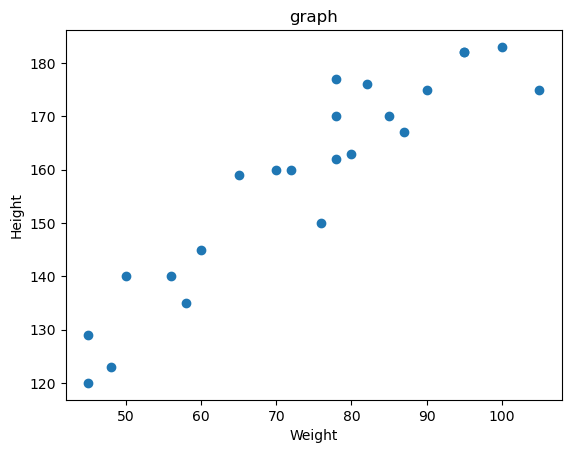

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("graph")

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [9]:
X= df[['Weight']] # independent feature

In [10]:

y = df['Height']  # dependent feature 

In [11]:
X.shape,y.shape

((23, 1), (23,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [15]:
y_train.shape,y_test.shape

((18,), (5,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [20]:
X_train_scaled =scaler.fit_transform(X_train)

In [22]:
X_test_scaled =scaler.transform(X_test)

(100.0, 200.0)

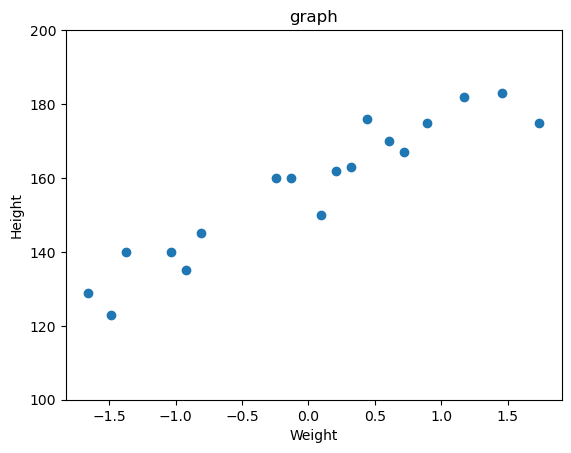

In [34]:
plt.scatter(X_train_scaled,y_train)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("graph")
plt.ylim(100,200)

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor = LinearRegression()

In [31]:
# training the train data
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
regressor.intercept_

157.5

In [35]:
regressor.coef_

array([17.03440872])

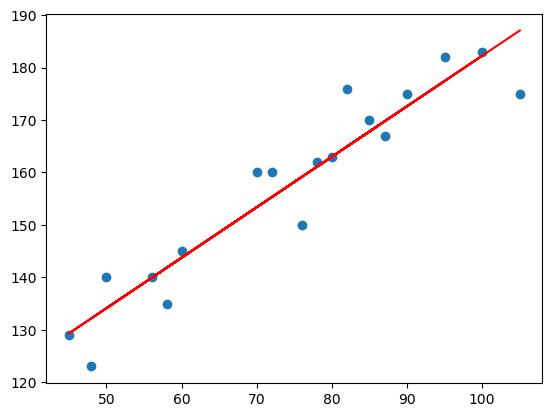

In [41]:
plt.scatter(X_train,y_train)
plt.plot (X_train,regressor.predict(X_train_scaled),c= 'red')

In [67]:
y_pred_test = regressor.predict(X_test_scaled)

In [68]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [47]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [56]:
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [57]:
from sklearn.metrics import r2_score

In [58]:
score = r2_score(y_test,y_pred_test)

In [59]:
score

0.7769869860423441

In [63]:
regressor.predict([[40]])

array([838.87634876])